In [1]:
import pandas as pd

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [3]:
custs = pd.DataFrame([[45000, 1000, True, 2, False], [70000, 100, True, 10, True],
             [30000, 2000, False, 0, False], [90000, 500, True, 2, True],
             [70000, 200, True, 5, False]],
            columns=['salary', 'total_bill', 'club_member', 'years_post-sec_ed',
                    'paid'])

In [4]:
test = custs.sort_values(['salary'])
test

,salary,total_bill,club_member,years_post-sec_ed,paid
2,30000,2000,False,0,False
0,45000,1000,True,2,False
1,70000,100,True,10,True
4,70000,200,True,5,False
3,90000,500,True,2,True


In [5]:
def highlight_split(x):
    if x.club_member == True:
        return ['background-color: yellow']*5
    else:
        return ['background-color: aqua']*5 
test.style.apply(highlight_split, axis=1)

,salary,total_bill,club_member,years_post-sec_ed,paid
2,30000,2000,False,0,False
0,45000,1000,True,2,False
1,70000,100,True,10,True
4,70000,200,True,5,False
3,90000,500,True,2,True


In [6]:
def highlight_split(x):
    if x.salary < 60000:
        return ['background-color: yellow']*5
    else:
        return ['background-color: aqua']*5 
test.style.apply(highlight_split, axis=1)

,salary,total_bill,club_member,years_post-sec_ed,paid
2,30000,2000,False,0,False
0,45000,1000,True,2,False
1,70000,100,True,10,True
4,70000,200,True,5,False
3,90000,500,True,2,True


In [7]:
ct = DecisionTreeClassifier() # Check out all the
                              # hyperparameter options here!

dt_mod = ct.fit(custs.drop('paid', axis=1), custs['paid'])
dt_mod.score(custs.drop('paid', axis=1), custs['paid'])

1.0

In [13]:
X =  custs.drop('paid',axis=1)
y = custs['paid']
y_pred = dt_mod.predict(X)

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
from yellowbrick.classifier import ConfusionMatrix

In [21]:
import numpy as np

In [23]:
import matplotlib.pyplot as plt

C:\Anaconda3\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


1.0

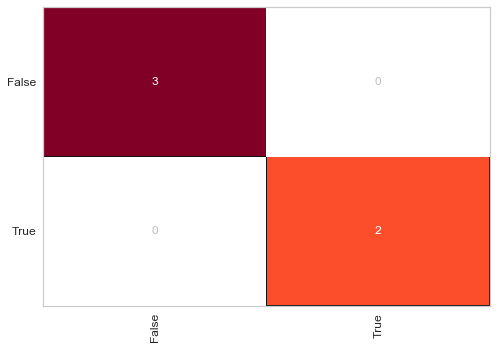

In [27]:
##Confusion matrix in yellow brick
cm = ConfusionMatrix(dt_mod)
cm.fit(X, y)
cm.score(X, y)


C:\Anaconda3\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


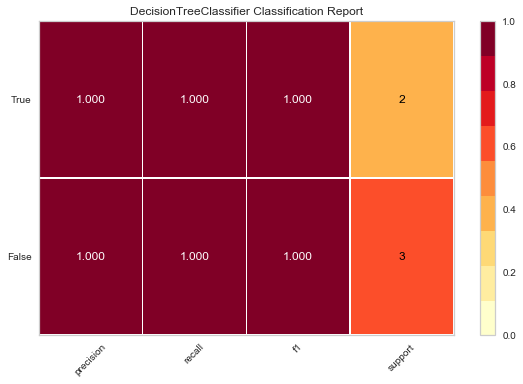

In [36]:
##Classification Report
classes = ['paid','unpaid']
from yellowbrick.classifier import ClassificationReport
cr = ClassificationReport(dt_mod, support=True)
cr.fit(X,y)
cr.score(X,y)
cr.show()

C:\Anaconda3\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


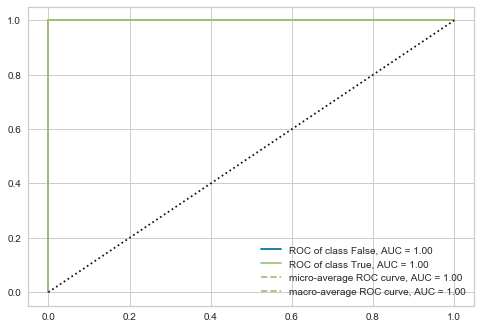

In [61]:
##ROCAUC Curve
from yellowbrick.classifier.rocauc import ROCAUC
rocauc = ROCAUC(dt_mod)
rocauc.fit(X,y)
rocauc.score(X,y)
plt.legend()


In [62]:
print(rocauc)

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B3E009130>,
       classes=None, encoder=None, force_model=False, is_fitted='auto',
       macro=True, micro=True, model=None, per_class=True)


C:\Anaconda3\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


#### Pros of Decision Trees
- Easy and intuitive to understand
- Useful in EDA / Data Exploration for splitting variables, binning data etc.
- Can capture non-linear data
- doesn't require as many (any) pre-processing steps
- datatype is not a constraint (features will not constrain)
- non parametric - no assumptions

#### Cons of Decision Trees

- Sensitive to noisy data
- Prone to overfitting
- struggles with splits for continuous variables
- can be biased with imbalanced data